In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")
df.head()

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,...,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
0,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,...,7.00,7.54,7.01,K,K,K,2.930693,3.029126,2.537143,0
1,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,...,4.69,5.47,5.07,Y,TB,TB,0.643564,1.019417,0.320000,0
2,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,...,5.77,5.38,6.04,TB,TB,TB,1.712871,0.932039,1.428571,1
3,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,...,6.21,5.20,6.88,TB,TB,K,2.148515,0.757282,2.388571,0
4,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,...,6.50,6.36,6.99,K,TB,K,2.435644,1.883495,2.514286,0


Phần 1: Thống kê dữ liệu

1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [3]:
df_sorted_dh1 = df.sort_values(by="DH1", ascending=True)
df_sorted_dh1[["DH1"]].head()

,DH1
53,1.00
43,1.25
5,1.50
72,1.50
83,1.75


2. Sắp xếp điểm DH2 tăng dần theo nhóm giới tính (GT)

In [4]:
df_sorted_dh2_gt = df.sort_values(by=["GT", "DH2"], ascending=[True, True])
df_sorted_dh2_gt[["GT", "DH2"]].head()

,GT,DH2
95,F,1.50
25,F,2.00
24,F,2.25
46,F,2.25
13,F,2.75


3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,
Q2 và Q3 của DH1 theo KT

In [5]:
pivot_kt = pd.pivot_table(
    df,
    values="DH1",
    index="KT",
    aggfunc=[
        "count", "sum", "mean", "median",
        "min", "max", "std",
        lambda x: x.quantile(0.25),
        lambda x: x.quantile(0.5),
        lambda x: x.quantile(0.75)
    ]
)

pivot_kt.columns = [
    "count","sum","mean","median","min","max","std","Q1","Q2","Q3"
]

pivot_kt


,count,sum,mean,median,min,max,std,Q1,Q2,Q3
KT,,,,,,,,,,
A,49,163.50,3.336735,3.25,1.00,6.50,1.274296,2.2500,3.25,4.250
A1,6,17.50,2.916667,3.00,2.00,4.25,0.861201,2.1875,3.00,3.250
B,9,29.50,3.277778,3.50,1.75,4.50,0.823905,3.2500,3.50,3.750
C,14,79.25,5.660714,5.25,4.75,7.00,0.812209,5.0625,5.25,6.375
D1,22,84.25,3.829545,3.75,1.25,6.75,1.370146,3.0000,3.75,4.875


4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,
Q2 và Q3 của DH1 theo KT và KV

In [11]:
pivot_kt_kv = pd.pivot_table(
    df,
    values="DH1",
    index=["KT", "KV"],
    aggfunc=["count","sum","mean","median","min","max","std",
             lambda x: x.quantile(0.25),
             lambda x: x.quantile(0.5),
             lambda x: x.quantile(0.75)]
)

pivot_kt_kv


count    sum      mean median   min   max       std <lambda>         \
         DH1    DH1       DH1    DH1   DH1   DH1       DH1      DH1    DH1   
KT KV                                                                        
A  1      29  93.75  3.232759  3.250  1.00  6.50  1.369194   2.0000  3.250   
   2       9  31.75  3.527778  3.500  2.00  6.25  1.427653   2.2500  3.500   
   2NT    11  38.00  3.454545  3.500  2.00  4.75  0.913908   2.8750  3.500   
A1 1       2   4.75  2.375000  2.375  2.00  2.75  0.530330   2.1875  2.375   
   2NT     4  12.75  3.187500  3.250  2.00  4.25  0.921389   2.9375  3.250   
B  1       8  25.75  3.218750  3.375  1.75  4.50  0.860207   3.0000  3.375   
   2NT     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500  3.750   
C  1       8  43.50  5.437500  5.250  4.75  7.00  0.728869   5.0000  5.250   
   2       2  11.50  5.750000  5.750  5.00  6.50  1.060660   5.3750  5.750   
   2NT     4  24.25  6.062500  6.000  5.25  7.00  0.943729   5.2500  6.000   
D1 1      13  46.75  3.596154  3.500  1.50  5.75  1.264658   2.7500  3.500   
   2       8  33.75  4.218750  4.500  1.25  6.75  1.617082   3.5625  4.500   
   2NT     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500  3.750   

                
           DH1  
KT KV           
A  1    4.2500  
   2    4.2500  
   2NT  4.1250  
A1 1    2.5625  
   2NT  3.5000  
B  1    3.5625  
   2NT  3.7500  
C  1    5.4375  
   2    6.1250  
   2NT  6.8125  
D1 1    4.2500  
   2    5.0000  
   2NT  3.7500

5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,
Q2 và Q3 của DH1 theo KT, KV và DT

In [12]:
pivot_kt_kv_dt = pd.pivot_table(
    df,
    values="DH1",
    index=["KT","KV","DT"],
    aggfunc=["count","sum","mean","median","min","max","std",
             lambda x: x.quantile(0.25),
             lambda x: x.quantile(0.5),
             lambda x: x.quantile(0.75)]
)

pivot_kt_kv_dt


count    sum      mean median   min   max       std <lambda>  \
             DH1    DH1       DH1    DH1   DH1   DH1       DH1      DH1   
KT KV  DT                                                                 
A  1   0.0    29  93.75  3.232759  3.250  1.00  6.50  1.369194   2.0000   
   2   0.0     8  27.50  3.437500  3.000  2.00  6.25  1.498511   2.2500   
       6.0     1   4.25  4.250000  4.250  4.25  4.25       NaN   4.2500   
   2NT 0.0    11  38.00  3.454545  3.500  2.00  4.75  0.913908   2.8750   
A1 1   0.0     2   4.75  2.375000  2.375  2.00  2.75  0.530330   2.1875   
   2NT 0.0     4  12.75  3.187500  3.250  2.00  4.25  0.921389   2.9375   
B  1   0.0     8  25.75  3.218750  3.375  1.75  4.50  0.860207   3.0000   
   2NT 0.0     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500   
C  1   0.0     8  43.50  5.437500  5.250  4.75  7.00  0.728869   5.0000   
   2   0.0     2  11.50  5.750000  5.750  5.00  6.50  1.060660   5.3750   
   2NT 0.0     4  24.25  6.062500  6.000  5.25  7.00  0.943729   5.2500   
D1 1   0.0    12  43.75  3.645833  3.625  1.50  5.75  1.307576   2.6875   
       1.0     1   3.00  3.000000  3.000  3.00  3.00       NaN   3.0000   
   2   0.0     7  32.50  4.642857  4.500  3.00  6.75  1.171334   4.1250   
       1.0     1   1.25  1.250000  1.250  1.25  1.25       NaN   1.2500   
   2NT 0.0     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500   

                           
              DH1     DH1  
KT KV  DT                  
A  1   0.0  3.250  4.2500  
   2   0.0  3.000  4.1875  
       6.0  4.250  4.2500  
   2NT 0.0  3.500  4.1250  
A1 1   0.0  2.375  2.5625  
   2NT 0.0  3.250  3.5000  
B  1   0.0  3.375  3.5625  
   2NT 0.0  3.750  3.7500  
C  1   0.0  5.250  5.4375  
   2   0.0  5.750  6.1250  
   2NT 0.0  6.000  6.8125  
D1 1   0.0  3.625  4.4375  
       1.0  3.000  3.0000  
   2   0.0  4.500  5.0000  
       1.0  1.250  1.2500  
   2NT 0.0  3.750  3.7500

Phần 2: Trình bày dữ liệu

1. Hãy trình bày dữ liệu biến: GT
Gợi ý
- Lập bảng tần số và tần suất
- Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn)

In [16]:
import matplotlib.pyplot as plt

In [11]:
freq_gt = df["GT"].value_counts()
ratio_gt = df["GT"].value_counts(normalize=True)

pd.DataFrame({"Tần số": freq_gt, "Tần suất": ratio_gt})


,Tần số,Tần suất
GT,,
M,52,0.52
F,48,0.48


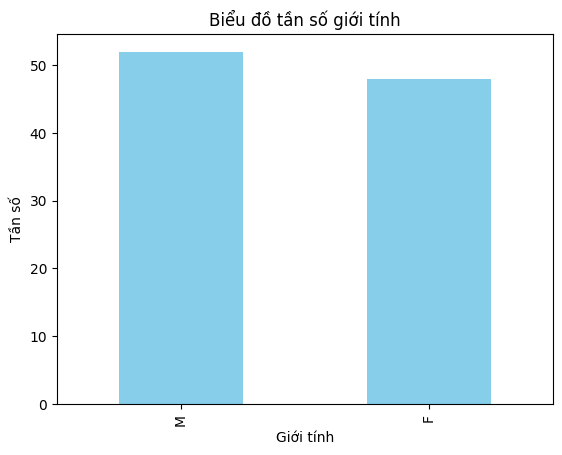

In [17]:
freq_gt.plot(kind="bar", color="skyblue")
plt.title("Biểu đồ tần số giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Tần số")
plt.show()

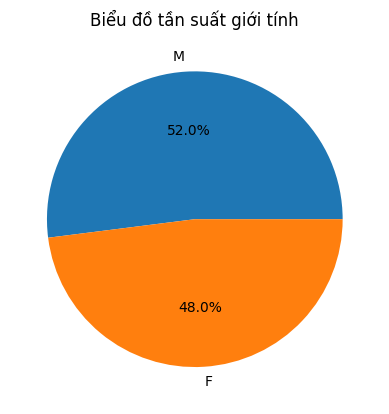

In [18]:
freq_gt.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Biểu đồ tần suất giới tính")
plt.show()


2. Trình bày US_TBM1, US_TBM2, US_TBM3

In [19]:
df[["US_TBM1","US_TBM2","US_TBM3"]].describe()


,US_TBM1,US_TBM2,US_TBM3
count,100.000000,100.000000,100.000000
mean,2.025941,1.921359,2.159314
std,0.968324,0.916640,0.856600
min,0.000000,0.000000,0.000000
25%,1.215347,1.104369,1.591429
50%,2.138614,1.990291,2.257143
75%,2.742574,2.730583,2.737143
max,4.000000,4.000000,4.000000


3. Biến DT với học sinh nam

In [21]:
import matplotlib.pyplot as plt

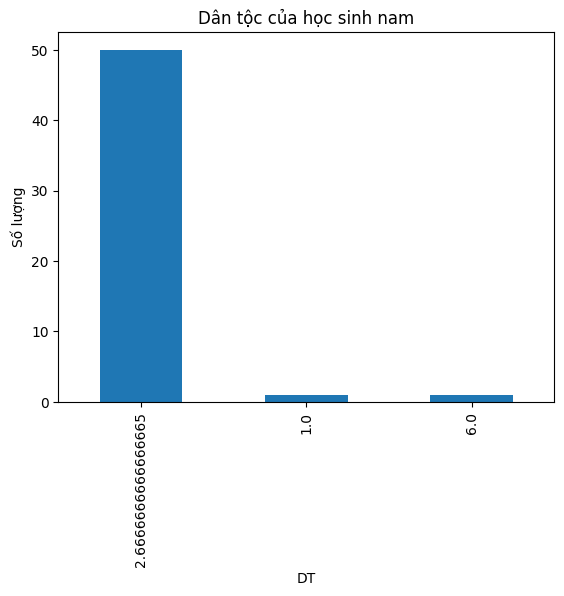

In [20]:

df["GT"] = df["GT"].astype(str).str.lower().str.strip()
df_nam = df[df["GT"].isin(["nam","1","m"])]

df_nam["DT"].value_counts().plot(kind="bar")
plt.title("Dân tộc của học sinh nam")
plt.xlabel("DT")
plt.ylabel("Số lượng")
plt.show()


4. Biến KV (nam, Kinh, DH1≥5, DH2≥4, DH3≥4)

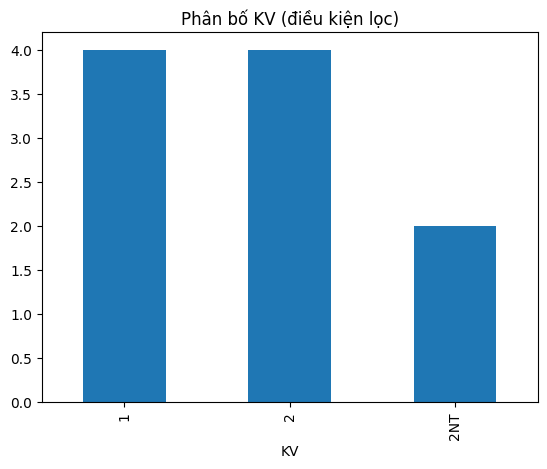

In [23]:

df_filter = df[
    (df["DH1"]>=5) & (df["DH2"]>=4) & (df["DH3"]>=4)
]

if df_filter.empty:
    print("Không có dữ liệu thỏa điều kiện")
else:
    df_filter["KV"].value_counts().plot(kind="bar")
    plt.title("Phân bố KV (điều kiện lọc)")
    plt.show()


5. DH1, DH2, DH3 ≥ 5 và KV = 2NT

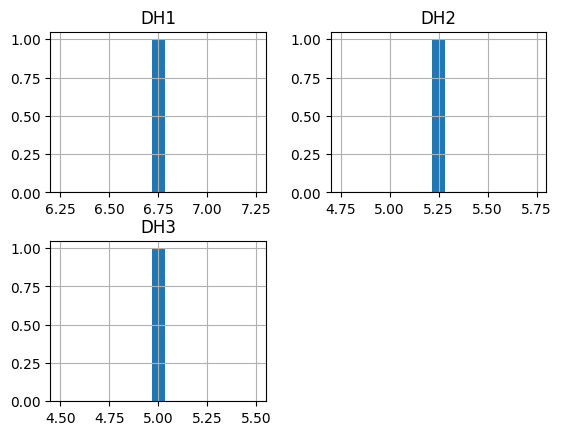

In [24]:
df_2nt = df[
    (df["KV"]=="2NT") &
    (df["DH1"]>=5) &
    (df["DH2"]>=5) &
    (df["DH3"]>=5)
]

df_2nt[["DH1","DH2","DH3"]].hist(bins=15)
plt.show()


PHẦN 3: TRỰC QUAN HÓA THEO NHÓM

1. Học sinh nữ – XL1, XL2, XL3 (unstacked)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

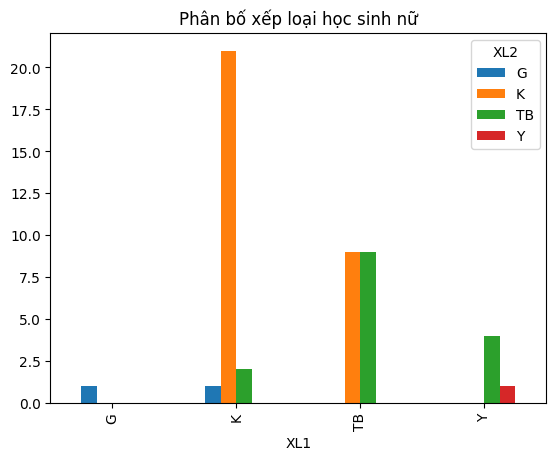

In [26]:
df_nu = df[df["GT"].astype(str).str.lower().str.contains("nu|0|f")]

pd.crosstab(df_nu["XL1"], df_nu["XL2"]).plot(kind="bar")
plt.title("Phân bố xếp loại học sinh nữ")
plt.show()


2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2

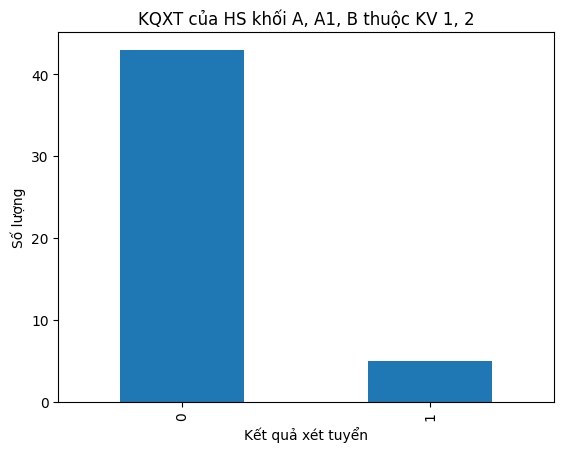

In [27]:
df_f = df[
    df["KT"].isin(["A","A1","B"]) &
    df["KV"].isin(["1","2",1,2])
]

df_f["KQXT"].value_counts().plot(kind="bar")
plt.title("KQXT của HS khối A, A1, B thuộc KV 1, 2")
plt.xlabel("Kết quả xét tuyển")
plt.ylabel("Số lượng")
plt.show()


3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi


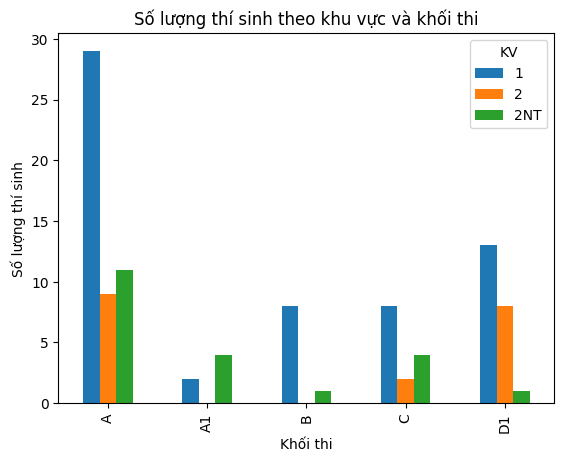

In [28]:
pd.crosstab(df["KT"], df["KV"]).plot(kind="bar")
plt.title("Số lượng thí sinh theo khu vực và khối thi")
plt.xlabel("Khối thi")
plt.ylabel("Số lượng thí sinh")
plt.show()


4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi

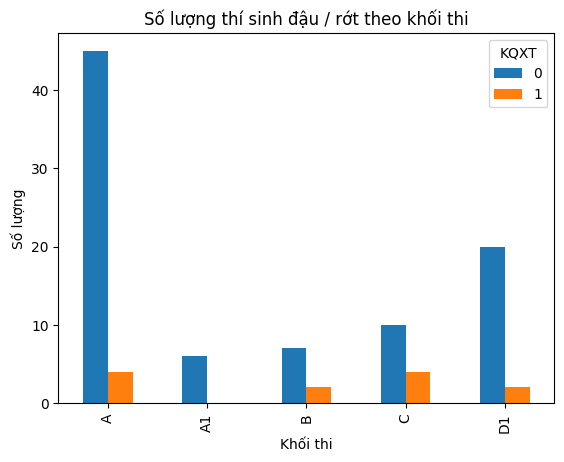

In [29]:
pd.crosstab(df["KT"], df["KQXT"]).plot(kind="bar")
plt.title("Số lượng thí sinh đậu / rớt theo khối thi")
plt.xlabel("Khối thi")
plt.ylabel("Số lượng")
plt.show()

5. Số lượng thí sinh đậu / rớt theo nhóm khu vực

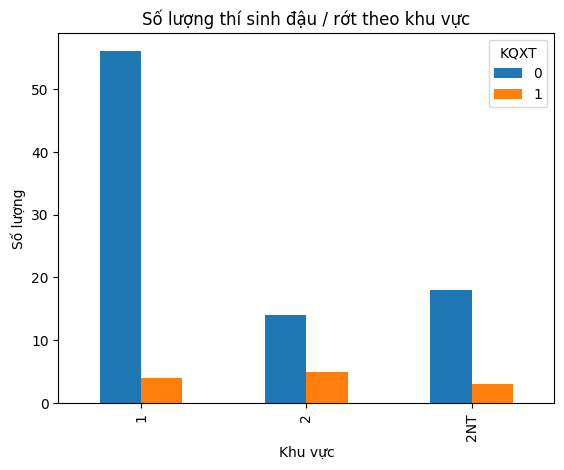

In [30]:
pd.crosstab(df["KV"], df["KQXT"]).plot(kind="bar")
plt.title("Số lượng thí sinh đậu / rớt theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Số lượng")
plt.show()

6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc

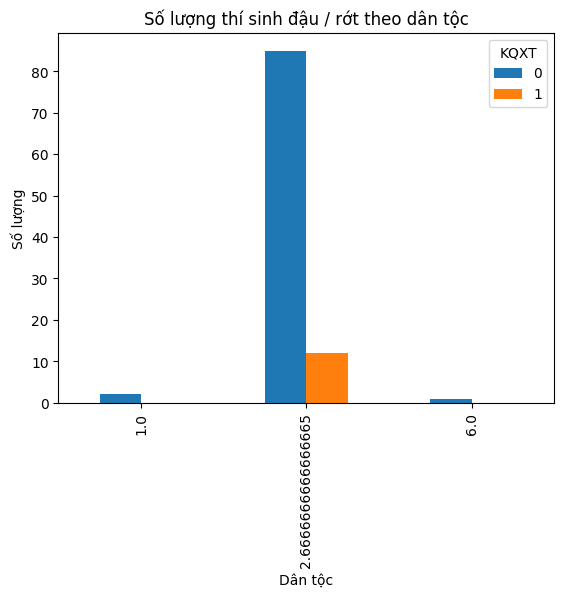

In [31]:

pd.crosstab(df["DT"], df["KQXT"]).plot(kind="bar")
plt.title("Số lượng thí sinh đậu / rớt theo dân tộc")
plt.xlabel("Dân tộc")
plt.ylabel("Số lượng")
plt.show()


7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính.


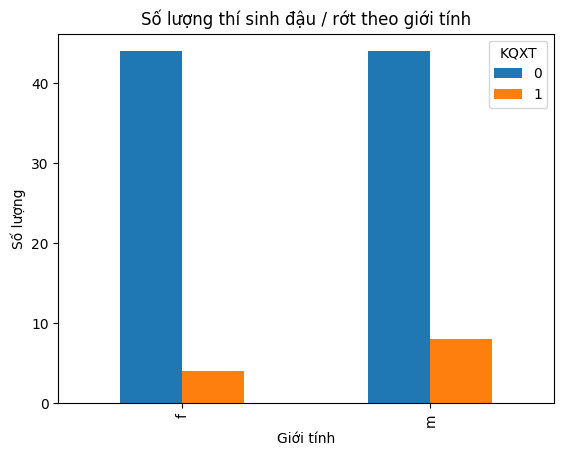

In [32]:
pd.crosstab(df["GT"], df["KQXT"]).plot(kind="bar")
plt.title("Số lượng thí sinh đậu / rớt theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.show()

Phần 4: Trực quan hóa dữ liệu nâng cao


1. Vẽ biểu đồ đường Simple cho biến T1
Kết quả

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

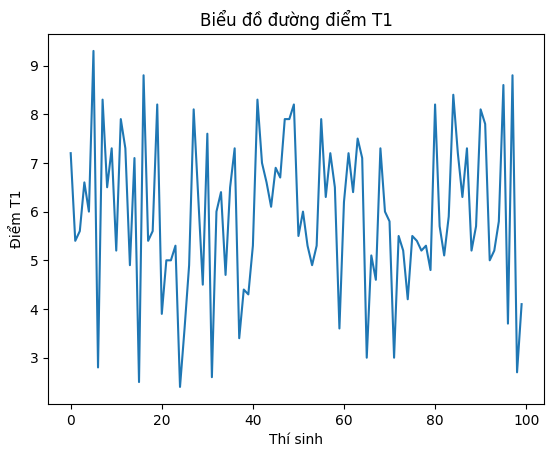

In [34]:
plt.plot(df["T1"])
plt.title("Biểu đồ đường điểm T1")
plt.xlabel("Thí sinh")
plt.ylabel("Điểm T1")
plt.show()

2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:
a. Từ 0 đến dưới 5 = kém (ký hiệu “k”)
b. Từ 5 đến dưới 7 = trung bình (ký hiệu “tb”)
c. Từ 7 đến dưới 8 = khá (ký hiệu “k”)
d. Từ 8 trở lên = giỏi (ký hiệu “g”)

In [35]:
df["phanlopt1"] = pd.cut(
    df["T1"],
    bins=[0,5,7,8,10],
    labels=["k","tb","kha","g"],
    right=False
)


3. Lập bảng tần số cho biến phanloait1

In [36]:
df["phanlopt1"].value_counts()


phanlopt1
tb     46
k      23
kha    19
g      12
Name: count, dtype: int64

4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
Kết quả

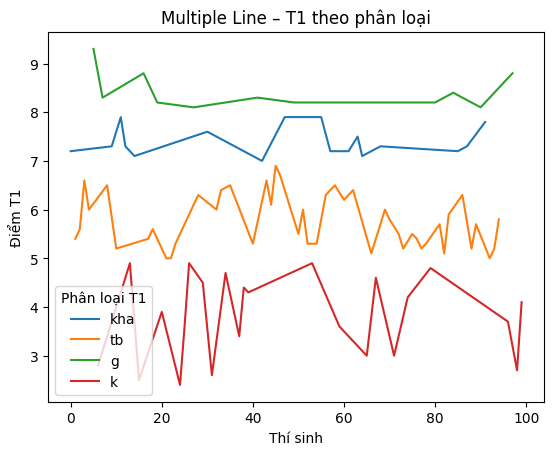

In [37]:
for loai in df["phanlopt1"].dropna().unique():
    plt.plot(df[df["phanlopt1"]==loai]["T1"], label=loai)

plt.legend(title="Phân loại T1")
plt.title("Multiple Line – T1 theo phân loại")
plt.xlabel("Thí sinh")
plt.ylabel("Điểm T1")
plt.show()


5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1
Kết quả

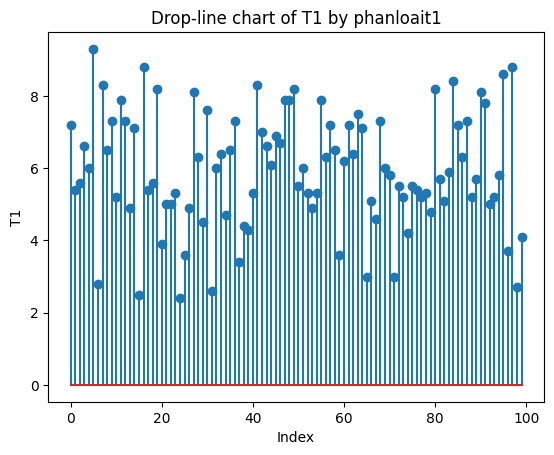

In [38]:
df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")

df["phanloait1"] = pd.cut(
    df["T1"],
    bins=[0, 5, 7, 8, 10],
    labels=["k", "tb", "kha", "g"],
    right=False
)

plt.figure()
plt.stem(df.index, df["T1"])
plt.title("Drop-line chart of T1 by phanloait1")
plt.xlabel("Index")
plt.ylabel("T1")
plt.show()

Phần 5: Mô tả dữ liệu và khảo sát dạng phân phối


1. Hãy mô tả và khảo sát phân phối cho biến T1
Gợi ý
- Mô tả độ tập trung và phân tán của dữ liệu T1
- Vẽ biểu đồ Box-Plot và xác định các 10 đại lượng trong biểu đồ đó
- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm
- Vẽ biểu đồ Histogram biểu thị hình dáng phân phối
- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn
- Kiểm chứng phân phối chuẩn QQ-Plot
- Nhận xét và đánh giá về phân phối của T1

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ma trận hiệp phương sai:
          DH1       DH2       DH3
DH1  2.028939  0.053081  0.027778
DH2  0.053081  1.123712 -0.101010
DH3  0.027778 -0.101010  1.083965

Ma trận tương quan:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


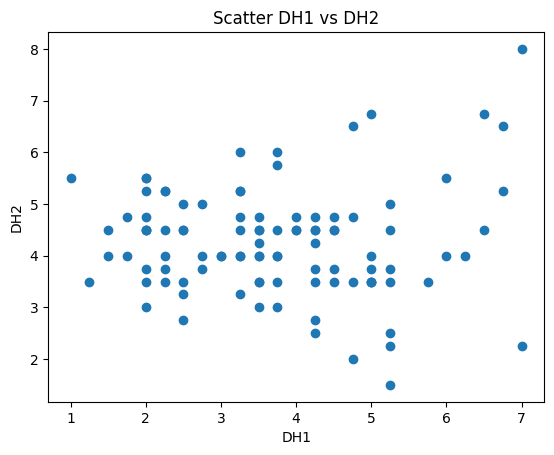

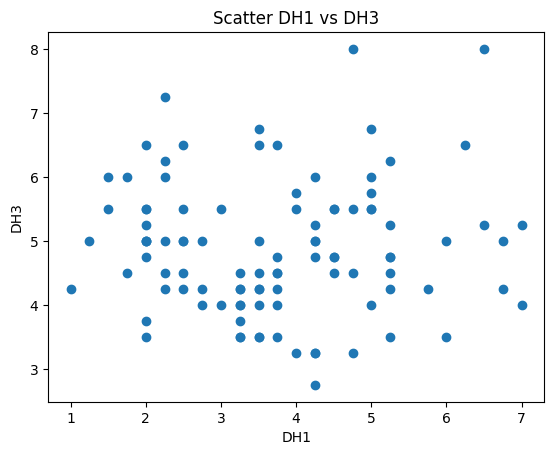

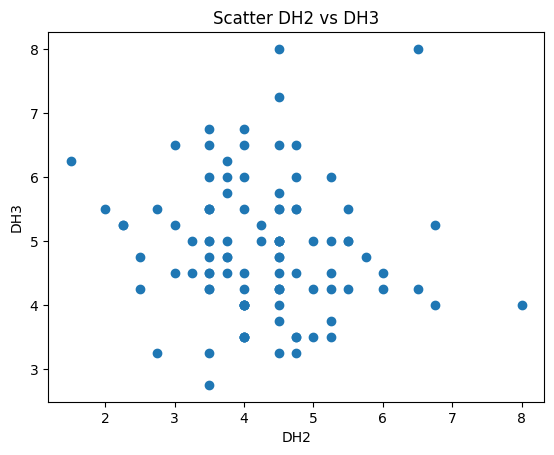

In [45]:

df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")


print("Ma trận hiệp phương sai:")
print(df[["DH1", "DH2", "DH3"]].cov())


print("\nMa trận tương quan:")
print(df[["DH1", "DH2", "DH3"]].corr())


plt.figure()
plt.scatter(df["DH1"], df["DH2"])
plt.xlabel("DH1")
plt.ylabel("DH2")
plt.title("Scatter DH1 vs DH2")
plt.show()


plt.figure()
plt.scatter(df["DH1"], df["DH3"])
plt.xlabel("DH1")
plt.ylabel("DH3")
plt.title("Scatter DH1 vs DH3")
plt.show()


plt.figure()
plt.scatter(df["DH2"], df["DH3"])
plt.xlabel("DH2")
plt.ylabel("DH3")
plt.title("Scatter DH2 vs DH3")
plt.show()